# Trabalho Prático 1 - Análise de Dados em Informática (Poluição Ambiental na Europa)

## 4.1 - Análise e Exploração de Dados

1. Construa um gráfico que permita visualizar os níveis médios do poluente __O3__ nas diversas regiões de
Portugal __(NUTS Code)__. Indique a região com nível médio de __O3__ mais elevado.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_europe = pd.read_csv("AIRPOL_data.csv", sep=";")

C:\Users\slvad\AppData\Local\Temp\ipykernel_28444\1194296249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3["Air_Pollution_Average[ug/m3]"] = df_portugal_o3["Air_Pollution_Average[ug/m3]"].str.replace(",", ".").astype(float)
C:\Users\slvad\AppData\Local\Temp\ipykernel_28444\1194296249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3["NUTS_Code"] = df_portugal_o3["NUTS_Code"].astype(str)


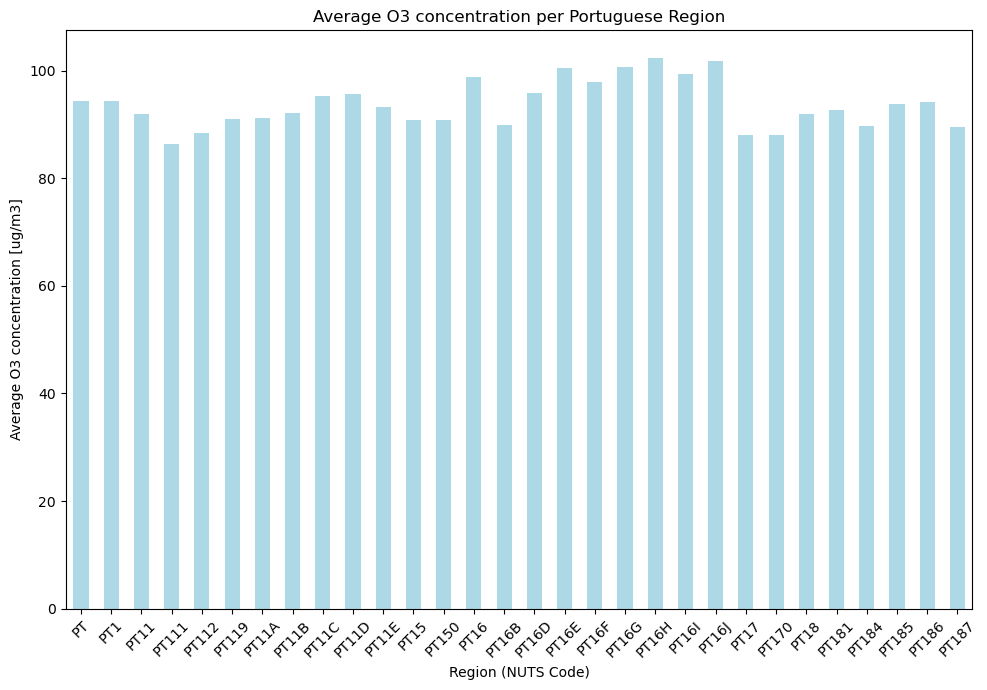

In [12]:
# Extract Portugal O3 data if there is any
df_portugal_o3 = df_europe[(df_europe["Country"] == "Portugal") & (df_europe["Air_Pollutant"] == "O3")]
if df_portugal_o3.empty:
    print("No O3 data for Portugal")
    exit()

# Convert "Air_Pollution_Average[ug/m3]" to float
df_portugal_o3["Air_Pollution_Average[ug/m3]"] = df_portugal_o3["Air_Pollution_Average[ug/m3]"].str.replace(",", ".").astype(float)
df_portugal_o3["NUTS_Code"] = df_portugal_o3["NUTS_Code"].astype(str)

# Calculate average O3 concentration per Portuguese Region (NUTS_Code)
avg_o3_per_region = df_portugal_o3.groupby("NUTS_Code")["Air_Pollution_Average[ug/m3]"].mean()

# Plot
plt.figure(figsize=(10, 7))
avg_o3_per_region.plot(kind="bar", color="lightblue")
plt.title("Average O3 concentration per Portuguese Region")
plt.xlabel("Region (NUTS Code)")
plt.ylabel("Average O3 concentration [ug/m3]")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Region with highest O3 concentration
max_o3 = avg_o3_per_region.idxmax()
max_o3_value = avg_o3_per_region.max()
print(f"Region with highest O3 concentration: {max_o3} with {max_o3_value:.2f} ug/m3")

Region with highest O3 concentration: PT16H with 102.40 ug/m3


2. Usando boxplots, construa um gráfico que permita comparar as distribuições dos níveis médios do poluente __PM2.5__ em Portugal, Espanha, Franca e Itália.

C:\Users\slvad\AppData\Local\Temp\ipykernel_28444\3360490207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y="Air_Pollution_Average[ug/m3]", data=df_countries_pm25, palette="Set3")


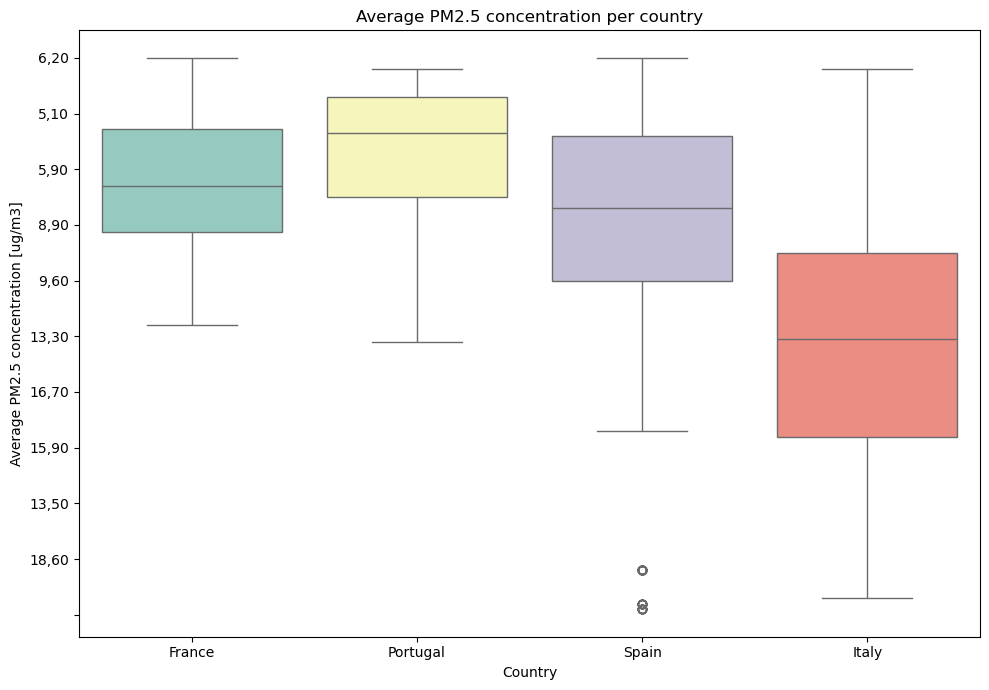

In [14]:
import seaborn as sns

# Extract countries and PM2.5 data
countries = ["Portugal", "Spain", "France", "Italy"]
df_countries_pm25 = df_europe[(df_europe["Country"].isin(countries)) & (df_europe["Air_Pollutant"] == "PM2.5")]

# Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x="Country", y="Air_Pollution_Average[ug/m3]", data=df_countries_pm25, palette="Set3")
plt.title("Average PM2.5 concentration per country")
plt.xlabel("Country")
plt.ylabel("Average PM2.5 concentration [ug/m3]")
plt.tight_layout()
plt.yticks(range(0, 101, 10))
plt.show()